# Logistic Regression

Build a binary classifier that:

Takes input X (n×d) and labels y (n,) of 0s and 1s
Learns weights w and bias b using gradient descent
Predicts probabilities using sigmoid
Uses cross-entropy loss

In [5]:
import numpy as np
import matplotlib.pyplot as plt

class LogisticRegression:
    def __init__(self, lr=0.1, epochs=1000):
        # store hyperparameters
        self.lr = lr
        self.epochs = epochs
    
    def fit(self, X, y):

        n, d = X.shape

        #init w and b
        self.w = np.zeros(d)
        self.b = 0

        # training loop
        self.X = X
        self.Y = y
        self.L=[]


        for epoch in range(self.epochs):
    
            #find z for each x_train val
            z = self.X @ self.w + self.b 
            
            #find sigmoid prop
            y_pred = self.sigmoid(z) 
            
            #find loss
            self.L.append(self.logLoss(self.Y, y_pred))
        
            #gradients
            dl_dw = (self.X.T@(y_pred-self.Y))/n
            
            dl_db = np.sum((y_pred-self.Y))/n
        
            #update
            self.w = self.w - self.lr*dl_dw
            
            self.b = self.b - self.lr*dl_db
    
    def predict_proba(self, X):
        # return probabilities
        return (self.sigmoid(X @ self.w + self.b))
        
    
    def predict(self, X):
        # return 0/1 predictions
        return (self.predict_proba(X)>=0.5).astype(int)
    
    def score(self, X, y):
        # return accuracy
        return np.mean(self.predict(X) == y)

    def loss(self):
        # return accuracy
        try:
            return self.L
        except AttributeError:
            print("Model not trained")
            
        
    
    #sigmoid
    def sigmoid(self,z):
        return 1/(1+np.exp(-z))
    
    #logLoss
    def logLoss(self,y_train, y_pred):
        y_pred = np.clip(y_pred, 1e-15, 1-1e-15)
        return -np.sum(y_train*np.log(y_pred) + (1-y_train)*np.log(1-y_pred)) / y_train.shape[0]

In [6]:
np.random.seed(42)

# 200 samples, 2 features
X_class0 = np.random.randn(100, 3) + np.array([0, 0,0])
X_class1 = np.random.randn(100, 3) + np.array([3, 3,3])

X = np.vstack([X_class0, X_class1])
y = np.array([0]*100 + [1]*100)

# Shuffle
idx = np.random.permutation(200)
X, y = X[idx], y[idx]

# Split
X_train, X_test = X[:160], X[160:]
y_train, y_test = y[:160], y[160:]

In [7]:
model = LogisticRegression(lr=0.1, epochs=1000)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

1.0


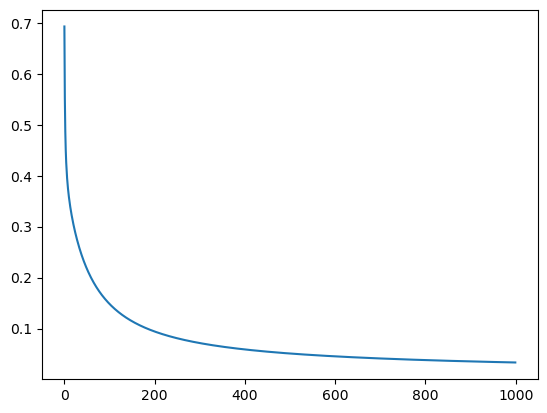

In [8]:
plt.plot(model.loss())
plt.show()